# The Jupyter notebook

This is a Jupyter notebook. It is a useful way of combining code, plots and text into a single document. In this workshop, I will be introducing (some of) you to using these notebooks and some of the basic Python skills that you will need to complete the course.

Important disclaimer: I make no claim that what I show you is the purest 'Pythonic' way of doing things, but it is a reasonable set of tools that will get you through the course. 

The basics of the coding will not be needed by some of you, but the problems related to phase-space flows should be newer to you

## Each of these individual "cells" can contain text or code. 

Text is entered in the markdown language [https://www.markdownguide.org/], basically it's a lot like LaTeX, but you have a few simpler options, such as making headings by starting a line with `#` or `##`, and making lists by starting lines with `*`.

### Warning!
<div class="alert alert-block alert-danger">
Notebooks execute code in the order you run the cells, not the order they appear in the notebook. You need to be careful about this, as it can lead to unexpected results otherwise. 
</div>

It is good practice to occasionally use the buttons that should be at the top of the notebook (or in the menu bar) to "Restart" the notebook, then "Clear All Outputs" and rerun from the start (e.g. "Run all")

## Setting up Python to do some science

Python's main selling point is the rich variety of code packages that already exist and are easy to add to your code so that you can use them. The three key ones for us are these: 

### numpy
numpy is a package that allows you to do numerical calculations in Python. It is very fast and has a wide range of functions that are useful for scientific computing. Notably it is very fast at doing calculations on arrays of numbers. It can also do things like random number generation and matrix algebra. [https://numpy.org/]

### matplotlib
matplotlib is a package that allows you to make plots in Python. It is very flexible and can make a wide range of plots. It is also relatively easy to use. We will generally use the `pyplot` module from matplotlib, which is a simplified interface to the package. [https://matplotlib.org/]

### scipy
scipy is a package that builds on numpy and provides a wide range of scientific computing tools. We will use it for things like numerical integration and binning data. [https://www.scipy.org/]

In [ ]:
# N.B. this is how I leave a comment in my code, I put it after a # symbol

# Importing the modules so that we can use them is as simple as this:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.stats
import copy
import sys


### For use on university machines/your machine if necessary

In [ ]:

# If you don not have numpy, matplotib or scipy installed, you can install them by running the following commands 
# (uncomment them as needed). You only need to run them once, and then you can comment them out again.

#!{sys.executable} -m pip install numpy

#!{sys.executable} -m pip install scipy
#!{sys.executable} -m pip install matplotlib

## Some simple operations using important libraries

I'm going to give a few quick examples of how these work. These should help you to get started with the exercises.

## Numpy

In [ ]:
# Python loves a list, defined by square brackets
x = [1, 2, 3, 4, 5]

# But they are not very good for doing maths, for example, you might know what to expect with this:
y = x * 2

In [ ]:
# But you get this:
print(y)

In [ ]:
# Or, just as bad, you might expect this to work:
y = x + 2
print(y)

In [ ]:
# But if i put it in a numpy array, it works as expected
x = np.array([1, 2, 3, 4, 5]) # note that any numpy command has to begin `np.`
y = x + 2
print(y)

In [ ]:
# So always put things in numpy arrays if you want to do maths with them
# You can also get numpy to make those arrays for you, for example
x = np.arange(0, 10, 2) # set array to values from 0 to 10 in steps of 2 – note there is no 10 in the array
x2 = np.linspace(0, 10, 6) # set array to values evenly spaced from 0 to 10 (including 10) with 6 values
print([x, x2])

In [ ]:
# If you want to know how a function works, you have a few options
# 1. Use the help function
print(help(np.linspace))

In [ ]:

# 2. Use the question mark
?np.linspace
# 3. Use the internet - Stack Overflow is often your friend


In [ ]:
# You can also demand random numbers. The preferred way to do this is to create a 'generator' which you then use to create random numbers

rng = np.random.default_rng() # create a random number generator
x = rng.random(10) # create an array of 10 random numbers between 0 and 1
x2 = rng.normal(0, 1, 10) # create an array of 10 random numbers from a normal distribution with mean 0 and standard deviation 1
print(x)
print(x2)

In [ ]:
# One can equally create 2D arrays, or even more dimensions
xy = np.array([[1, 2, 3, 4], [5, 6, 7, 8]]) # create a 2D array
xyr = rng.random((2, 3)) # create a 2D array of random numbers
print(xy)
print (xyr)

### Indexing

Once you have arrays, you may be interested in individual values within them, or just a subset of the values (e.g., one row or one column)

Both rows and columns are numbered from 0. That means that the first element of x is x[0,0]. The thing that most often catches people about this is that the last element of, e.g., an N by N array is x[N-1,N-1].

In [ ]:
print(xyr[0, 0]) # get the first element of the first row
print(xyr[0][0])
print(xyr[0, :]) # get the first row
print(xyr[:, 0]) # get the first column
# print(xyr[2, :]) # this would give an error as this is a 2-row array

Notice the use of a colon to indicate that we want all values from a given row or column.  
This is the most basic version of their use, but they can be used to reference any continuous block of values along a row or column. 

The syntax is that if you reference x[a:b], this will be an array with the values with the a, a+1, ..., b-1 indicies (i.e., not including b)

Leaving either side of the colon empty tells the code that you want all the values on that side until the first/last (depending on which side you've left blank). That is why leaving both sides blank (e.g., x[:] gives all the values).



In [ ]:

print(xy[0, 1:]) # get the second element onwards of the first row
print(xy[0, :2]) # get the first and second elements of the first row
print(xy[:, 1:3]) # get the second and third columns

### Health warning!
<div class="alert alert-block alert-danger">
Unless you are quite careful, python arrays can cause strife and heartache. For example, look at the code below, and think what you would expect the answer to be before you run.
</div>

In [ ]:
demo_1 = np.array([0,1,2,3,4,5])
new_thing = demo_1
new_thing[0] = 100
print(demo_1)

We only changed new_thing, so why did demo_1 change? 

The problem is with what "new_thing = demo_1" means. You might expect it to mean "create a new array, called new_thing, with the same values as demo_1". It does not.  
Instead it means "new_thing is now a new (additional) name for demo_1"!

*(Those of you who have done C or C++ programming may recognise this as a pointer)*

Can we create something called new_thing which is a new array, called new_thing, with the same values as demo_1? Yes, using the package 'copy', as below:

In [ ]:
import copy
demo_1 = np.array([0,1,2,3,4,5])
new_thing = copy.copy(demo_1)
new_thing[0] = 100
print(demo_1)

### Useful functions
numpy has a wide range of useful functions, and it is usually well worth looking at the documentation to see if there is a function that does what you want. Here are a few examples of things you can do with numpy.

In [ ]:
# Other helpful little functions
xmax = np.max(x) # find the maximum value in an array
xmin = np.min(x) # find the minimum value in an array
xsum = np.sum(x) # find the sum of all the values in an array
xmean = np.mean(x) # find the mean of all the values in an array
print([xmax, xmin, xsum, xmean])
print([np.pi, np.e]) # get the value of pi and e

In [ ]:
# Or standard mathematical functions, for example
print(np.sin(x)) # note that this assumes x is in radians
print(np.sqrt(x))

### Exercise 1: Numpy
<div class="alert alert-block alert-info"> Using a single numpy array as input, calculate $\sin of 0, \pi/4, \pi/2, ... 2\pi$.

Try doing this using two different methods for setting up the input array
</div>



## Matplotlib

Making simple plots is, pleasingly, simple using matplotlib

In [ ]:
# Draw a simple line graph
x = np.linspace(0, 10, 21)
y = x**2 # note that this is a vectorised operation, so it squares each element of x
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show() # this is necessary to actually display the plot properly

In [ ]:
# Or alternatively, plotting points
plt.plot(x, y, '.') # '.' means plot dots, not lines
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Better plotting

The above are examples of the most basic plots that you will need to make in Python, however, they are pretty ugly. There are various ways of making your plots look nicer. I will give my very simple usual method for making text readable and axes useful, here but other ways of doing this are available.


In [ ]:
# Adding these commands once before you plot things makes all your plots better
plt.rcParams.update({
     'xtick.minor.visible' : True, # make changes to tickmarks
     'xtick.top' : True, 
     'ytick.minor.visible' : True, 
     'ytick.right' : True,
     'xtick.direction' : 'in', 
     'ytick.direction' :'in',
     'font.size' : 14,} # increase the font size for readability
)

One thing to note is that you can do basic plots using commands of the form plt.XXX (where you can see at the top of this notebook we have already told the code to "import matplotlib.pyplot as plt"). This does things to whatever bit of the figure it assumes (or knows) you want it to. That's fine if you only want to make one simple plot at a time. 

*However*, often we want to have multiple plots in the same figure. In that instance it makes sense to break up the figure into multiple axes, and use functions on each of those axes directly. The syntax is similar but not identical, and an example is given below. 

In [ ]:
# Let's do better plots, now that we've set some nice default parameters
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,4)) # create a figure with two subplots

# I now plot by giving a command to the axes (i.e., a single panel of the figure)
# The syntax is a little different from when we just use plt.plot, but the documentation is pretty good

ax[0].plot(x, y, c='r') # plot in red
sca = ax[1].scatter(x, y, c=np.sin(x)) # scatter plot where the colour is determined by the sin of x
plt.colorbar(sca , ax=ax[1], label='sin(x)') # add a colour bar to the second plot

# Add some labels
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_xlabel('y')
ax[1].set_ylabel('x')

ax[0].set_title(r'$y = x^2$') # Notice that you can use LaTeX formating for maths, but you have to put an 'r' before the string
ax[1].set_title('flipped it')

plt.tight_layout() # this makes sure the plots don't overlap

plt.show()




### 2D plots

Being able to represent 2-or-more-dimensional data is essential for understanding fluid or phase-space flows.

<div class="alert alert-block alert-info"> Complete the basic examples below to illustrate how (and how not) to do this.



In [ ]:
x_data = rng.normal(0, 1, 20)
y_data = rng.normal(0, 1, 20)
# Plot this data using the plt.plot() command

Unless you alter the plot command to use points instead of lines (which is possible), everything will be connected which makes no sense given the data you have there. More useful is a scatter plot.

In [ ]:
# Create a scatter plot of x_data and y_data instead


You can also colour the markers to reflect a different value of interest (which we could call z_data). There is an example a few plots back.

#### Beyond the scatter plot

When we have large numbers of data values, scatter plots become much less useful. What we need instead is some way of showing the density of points, and/or average values as a function of the two values on our axes.

In [ ]:
x_blob = rng.normal(0, 1, 5000)
y_blob = rng.normal(0, 1, 5000)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5))

# Your task: Plot these data as a scatter plot in ax[0]


# Alternative: plots as a 2D histogram 
im = ax[1].hist2d(x_blob, y_blob, bins=[np.linspace(-3, 3, 21), np.linspace(-3, 3, 21)], density=True) # create a 2D histogram
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_aspect('equal')
plt.colorbar(im[3], ax=ax[1], label='density')
plt.show()


Now using scipy to calculate the mean value of some third quantity (z) in each bin, then plotting it with matplotlib. This is a very common use of these two packages together.

Note that we are use the `imshow` function from matplotlib to make the colourplot. This function is very common, but it is also a bit of a pain. Note that you have to take the transpose of the array you are plotting, and that the origin needs to be set to 'lower' to get the axes the right way up.

In [ ]:
z = np.sin(5.*x_blob) + rng.normal(0, 0.1, 1000) # create a noisy sin wave
z_average = scipy.stats.binned_statistic_2d(x_blob, y_blob, z, statistic='mean', bins=[np.linspace(-3, 3, 21), np.linspace(-3, 3, 21)]) # calculate the mean of z in each bin

plt.imshow(z_average.statistic.T, # Transpose the array so that it is oriented correctly
           extent=[-3, 3, -3, 3], # tells it the range of the data in x & y
           origin='lower') # tells it to plot the origin in the lower left

plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='mean z')
plt.show()

## Important Python details

### Indentation
Python uses indentation to define blocks of code. This is different from many other languages, which use curly braces or similar. This means that you need to be careful with your indentation.

### Functions
Functions in Python are defined using the `def` keyword. They can take any number of arguments and can return any number of values. A few examples are given below.

### Comments
There are three ways of doing comments in a Jupyter notebook
1. In a markdown cell like this one
2. In triple quotation marks. This is often used at the start of functions to document what the function does
3. In a line after after a # 

# Phase-space density

Now we've done a quick introduction to Python notebooks for anyone who needs it, we can move on to the meat of the workshop.

First of all, we are going to look at the evolution of phase-space density in a simple system, namely the behaviour of a large number of equivalent pendulums.

We're going to make the simplifying assumption that the pendulums are all of mass 1kg and length 1m. This means that our equations of motion are relatively simple. You have the equations of motion in the notes, and I will implement it below for small swings of the pendulum, i.e., in the limit $\sin\theta = \theta$.

In [ ]:
# equations of motion for a phase-space point corresponding to our pendulum, in the limit of small angles

phase_space_point_0 = np.array([0.05, 0]) # initial angle and momentum
amplitude = 0.05 # amplitude of the oscillation
g = 9.8 # m s^{-2}

def time_derivative_small_angle(phase_space_point, time): 
    '''Compute the time derivative of a phase-space point for a 1m, 1kg pendulum in the small angle limit
    
    Note that the time argument is not used in this function, but it is necessary for the integration function to work'''
    angle = phase_space_point[0]
    momentum = phase_space_point[1]
    angle_derivative = momentum # because m & l are 1
    momentum_derivative = -g * angle # because m & l are 1 and small angle approximation
    return [angle_derivative, momentum_derivative]


### We're going to use a scipy package to follow the evolution of the pendulum.

Generally, we need to use numerical integration to follow the evolution of a phase-space point. For a simple pendulum we can also solve this analytically, but we're going to use the numerical integration to show you how it works.

In [ ]:
t_numerical = np.linspace(0, 10, 500) # The values of t at which I want the integrator to give me results
results = integrate.odeint(func=time_derivative_small_angle, 
                           y0=phase_space_point_0, 
                           t=t_numerical)

In this case we can compare to the analytical solution, which is a simple harmonic oscillator.

$\theta = 0.05 \cos(\sqrt{g}t)$  
$p_\theta = -0.05\sqrt{g}\sin(\sqrt{g}t) $

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12,3))
t = np.linspace(0,2*np.pi/np.sqrt(g), 50)
omega = np.sqrt(g)

theta_numerical = results[:,0] # the first column of the results array is the angle
p_theta_numerical = results[:,1] # the second column of the results array is the momentum

ax[0].plot(t_numerical, theta_numerical, label='numerical')
ax[0].plot(t, amplitude*np.cos(t*omega), 'x',label='analytical')
ax[0].set_xlabel('t')
ax[0].set_ylabel(r'$\theta$')
ax[0].set_xlim(0,2*np.pi/np.sqrt(g))
ax[0].legend(frameon=False)

ax[1].plot(t_numerical, p_theta_numerical, label='numerical')
ax[1].plot(t, -amplitude*omega*np.sin(omega*t), 'x',label='analytical')
ax[1].set_xlabel('t')
ax[1].set_ylabel(r'$p_\theta$')
ax[1].set_xlim(0,2*np.pi/np.sqrt(g))


ax[2].plot(theta_numerical, p_theta_numerical, label='numerical')
ax[2].plot(amplitude*np.cos(t*omega), -amplitude*omega*np.sin(omega*t), 'x',label='analytical')
ax[2].set_xlabel(r'$\theta$')
ax[2].set_ylabel(r'$p_\theta$')
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

# Your turn!

<div class="alert alert-block alert-info"> Now I want you to write some code to calculate the phase-space trajectory of a pendulum, now for the general case where we can't use the small angle approximation.
</div>

In [ ]:

def time_derivative_pendulum(phase_space_point, time):
    '''Compute the time derivative of a phase-space point for a 1m, 1kg pendulum for any angle
    
    You will need to write this function, following the pattern of the small angle function above'''
    return

# Do the same kind of integral as before, you can use the same starting point and t


# Plot the results




## Do the same for many pendulums to create a map of the possible phase-space trajectories 

In [ ]:
# Here I create a 10 by 2 array containing the initial phase space points, with the angles evenly spaced between 0 and 0.9pi

n_starting_points = 10
initial_thetas = np.linspace(0, 0.9*np.pi, n_starting_points)
initial_p_thetas = np.zeros_like(initial_thetas)
initial_phase_space_points = np.array([initial_thetas, initial_p_thetas]).T # the .T is a transpose, so that the array is the right shape


for i in range(n_starting_points):
    # Integrate the equations of motion for the starting point, which is initial_phase_space_points[i]

    # Plot the results in the theta-p_theta plane (no need to plot the time evolution)
    
    j=i # this is just so there's something in this loop, you can delete it






You should produce plots that show concentric rings around the centre, but for the pendulums released at larger angles, the rings should be less circular/elliptical.

## Phase-space density

You will now look at the evolution of the phase-space density of the pendulum system. To do this we're look at the evolution of the area bounded by 4 points that start in a small square in phase-space.

If phase-space density is to be conserved, then the area should remain constant.

In [ ]:
# the four corners of a square in phase space
initial_phase_space_square = np.array([[1,1], [1,1.2], [1.2,1.2], [1.2,1]]) 

all_output = np.zeros((4, len(t_numerical), 2)) 
# create an array to store the results of the integrations

for i in range(4):
    # Integrate the equations of motion for the starting point, which is initial_phase_space_square[i]

    all_output[i] = 0 # replace zero here wih the output of the integration

# Plot a few examples of the positions of these boxes in phase space after some time


In [ ]:
def PolyArea(x,y):
    '''A function that calculates the area of a polygon given the x and y coordinates of its vertices'''
    # Thanks to the writer of the top answer here: 
    # https://stackoverflow.com/questions/24467972/calculate-area-of-polygon-given-x-y-coordinates
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

# Using the function above (or otherwise), calculate the area of the square in phase space as a function of time


Is the area you've calculated conserved over the time you have integrated the system for? If not, why not?

## Double pendulum

The movement of a double pendulum is much, much more complicated than that of a single pendulum. In fact it is a chaotic system in the mathematical sense: A small difference in initial condition becomes dramatically amplified over time.

The setup is as below:

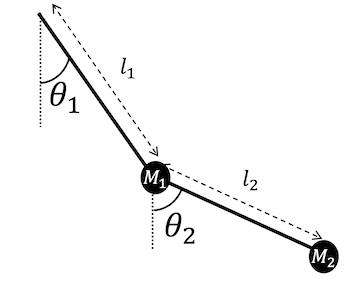

### Attaching pictures in a Jupyter notebook

If you look at what I've done above to attach this figure, you will see a small line of code, but if I just type that out then the figure will not attach. There are numerous ways of getting a picture from a file into a Jupyter notebook, but most of them require the picture to be provided with the Jupyter notebook.

The two ways of fixing a picture into a jupyter notebook that seem, to me, most sensible are:  
1. Drag-and-drop the picture (this doesn't seem to work in all cases)
2. Copy-and-paste the picture file (Ctrl-C on the file, Ctrl-V in the Markdown cell, or Cmd-C, Cmd-V if you are on a Mac)

In this exercise we will also now give that a try for you.

The equations of motion for a double pendulum are best followed using Hamiltonian dynamics or the Euler-Lagrange equations. I have determined the derivatives of the quantities $(\theta_1, \theta_2, \dot\theta_1, \dot\theta_2)$, i.e., the values $(\dot\theta_1, \dot\theta_2, \ddot\theta_1, \ddot\theta_2)$, and coded them in below

In [ ]:
# Pendulum rod lengths (m), bob masses (kg).
L1, L2 = 1, 1
m1, m2 = 1, 1
# The gravitational acceleration (m.s-2).
g = 9.81

def deriv(y, t, L1, L2, m1, m2):
    """Return the first derivatives of the angles theta_1,2 and rate-of-change dtheta1,2/dt.
    
    These have all been worked out using the Euler-Lagrange equations"""
    theta1, z1, theta2, z2 = y 
    # We've renamed the derivatives to z1 and z2 to make the equations more compact

    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)

    theta1dot = z1
    z1dot = (m2*g*np.sin(theta2)*c - m2*s*(L1*z1**2*c + L2*z2**2) -
             (m1+m2)*g*np.sin(theta1)) / L1 / (m1 + m2*s**2)
    theta2dot = z2
    z2dot = ((m1+m2)*(L1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) + 
             m2*L2*z2**2*s*c) / L2 / (m1 + m2*s**2)
    return theta1dot, z1dot, theta2dot, z2dot

def calc_E(y):
    """Return the total energy of the system."""

    th1, th1d, th2, th2d = y.T
    V = -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
    T = 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 +
            2*L1*L2*th1d*th2d*np.cos(th1-th2))
    return T + V


Now set some initial conditions and see what the system does. We'll start by plotting the position of the second pendulum bob.

In [ ]:

# Maximum time, time point spacings and the time grid (all in s).
tmax, dt = 30, 0.01
t = np.arange(0, tmax+dt, dt)


# Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
y0 = np.array([3*np.pi/7, 0, 3*np.pi/4, 0])



# Do the numerical integration of the equations of motion
y = integrate.odeint(deriv, y0, t, args=(L1, L2, m1, m2))

# Check that the calculation conserves total energy to within some tolerance.
EDRIFT = 0.05
# Total energy from the initial conditions
E = calc_E(y0)
if np.max(np.sum(np.abs(calc_E(y) - E))) > EDRIFT:
    sys.exit('Maximum energy drift of {} exceeded.'.format(EDRIFT))

# Unpack z and theta as a function of time
theta1, theta2 = y[:,0], y[:,2]
dtheta1, dtheta2 = y[:,1], y[:,3]

# Convert to Cartesian coordinates of the two bob positions.
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

plt.plot(x2, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

but we can also do a phase space diagram

In [ ]:
theta2_mod = np.mod(theta2, 2*np.pi)
if np.max(theta2_mod) > np.pi:
    theta2_mod[theta2_mod > np.pi] -= 2*np.pi
plt.plot(theta2_mod, dtheta2)
plt.xlabel(r'$\theta_2$')
plt.ylabel(r'$d\theta_2/dt$')
plt.savefig('PhaseSpace1.png') # save figure to file
plt.show()


### Try changing the initial conditions, re-running and see what you get

### Also: attaching images

You should have noticed that the previous plot was saved as 'PhaseSpace1.png'. Try to attach it to this notebook in this Jupyter cell using one of the methods described above.

# Orbits in the Milky Way

OK, this is kind of your lecturer's specialism, so you'll have to excuse him setting you it as a topic here. To do so, unfortunately we have to set up a bit of code. Please feel free to ignore the next cell if you're not interested in this.

In [ ]:
# units kpc =  3.0857e19 m; Msun = 1.98847e30 kg; t = kpc/(km/s) = 3.0857e16 s
G = 6.67e-11 / (3.0857e19)**3 * 1.98847e30 * (3.0857e16)**2

def miyamoto_nagai_potential(x, y, z, a, b, M):
    """
    Calculate the potential and force from a Miyamoto-Nagai potential.
    
    Arguments:
    x, y, z -- Cartesian coordinates of the point
    a -- scale parameter in the x-y plane
    b -- scale parameter in the z direction
    M -- total mass
    
    Returns:
    potential -- the potential at the given point
    force_x, force_y, force_z -- the force components in the x, y, and z directions at the given point
    """
    R = np.sqrt(x**2 + y**2)
    bracketed_term = R**2 + (a + np.sqrt(z**2 + b**2))**2
    potential = -G * M / np.sqrt(bracketed_term)
    
    force_x = x * potential / bracketed_term
    force_y = y * potential / bracketed_term
    force_z = z * potential / bracketed_term * (a + np.sqrt(z**2 + b**2)) / np.sqrt(z**2 + b**2)
    
    return potential, force_x, force_y, force_z

def logarithmic_potential(x, y, z, v0, r_core):
    """
    Calculate the potential and force from a logarithmic galactic potential.
    
    Arguments:
    x, y, z -- Cartesian coordinates of the point
    v0 -- characteristic velocity
    r_core -- core radius
    
    Returns:
    potential -- the potential at the given point
    force_x, force_y, force_z -- the force components in the x, y, and z directions at the given point
    """
    R = np.sqrt(x**2 + y**2)
    r = np.sqrt(R**2 + z**2)
    
    potential = 0.5 * v0**2 * np.log(r_core**2 + r**2)
    
    force_x = -v0**2 * x / (r**2 + r_core**2)
    force_y = -v0**2 * y / (r**2 + r_core**2)
    force_z = -v0**2 * z / (r**2 + r_core**2)
    
    return potential, force_x, force_y, force_z

def combined_miyamoto_logarithmic(x,y,z,a,b,M,v0,r_core):
    """
    Calculate the combined potential and force from Miyamoto-Nagai and logarithmic galactic potentials.
    
    Arguments:
    x, y, z -- Cartesian coordinates of the point
    a -- scale parameter in the x-y plane for Miyamoto-Nagai potential
    b -- scale parameter in the z direction for Miyamoto-Nagai potential
    M -- total mass for Miyamoto-Nagai potential
    v0 -- characteristic velocity for logarithmic potential
    r_core -- core radius for logarithmic potential
    G -- gravitational constant
    
    Returns:
    potential -- the combined potential at the given point
    force_x, force_y, force_z -- the combined force components in the x, y, and z directions at the given point
    """
     
    p1, fx1, fy1, fz1 = miyamoto_nagai_potential(x,y,z,a,b,M)
    p2, fx2, fy2, fz2 = logarithmic_potential(x,y,z,v0,r_core)
    return p1+p2, fx1+fx2, fy1+fy2, fz1+fz2

def Milky_Way_Potential_Force(x, y, z):
    """
    Calculate the combined potential and force from the Milky Way potential.
    
    Arguments:
    x, y, z -- Cartesian coordinates of the point
    
    Returns:
    potential -- the combined potential at the given point
    force_x, force_y, force_z -- the combined force components in the x, y, and z directions at the given point
    """
    return combined_miyamoto_logarithmic(x, y, z,  a=5, b=0.25, M=6e10, v0=195, r_core=2)


## The key points from the above code

We are working with the following units: Distance unit kpc; mass unit Msun; and velocity unit 1 km/s. This means that the unit of time (=1 kpc/(km/s)) is 0.9776 Gyr (i.e., $9.776\times10^8$ years).

For scale, the Sun is about 8 kpc from the centre of the Milky Way, the velocity of a circular orbit at this distance is about 220 km/s, and the Sun orbits the centre of the galaxy about once every 0.2 Gyr.

I have defined a function **Milky_Way_Potential_Force(x, y, z)** that returns the gravitational potential and force (per unit mass) in the x, y & z directions at a point (x, y, z) in the Milky Way. This is a simple model of the Milky Way, but it is a pretty decent approximation.

## Your task

<div class="alert alert-block alert-info">With this information, you should be able to calculate the orbits of stars in the Milky Way. We can start with the Sun.

This is just an extension of what you did with the pendulum, but we have three coordinate directions, and three components of momentum to follow. We'll be working in Cartesian coordinates, so we have $x$, $y$ and $z$ coordinates, and $p_x$, $p_y$ and $p_z$ momenta. Since we're in a collisionless system, we don't have to worry about the interactions between stars, just the gravitational potential, so we can ignore the mass of the Sun itself and just work in terms of the positions and velocities.
</div>

In [ ]:
phase_space_point_Sun_now = np.array([8.1, 0, 0.01, 10., 230, 8]) # x, y, z, vx, vy, vz for the now
# Values are approximate, but see Schönrich et al. 2010, and Gravity Collaboration et al 2020 for more accurate values

def time_derivative_galaxy(phase_space_point, time):
    '''Compute the time derivative of a phase-space point for the Milky Way potential
    
    You will need to write this function, following the pattern of the small angle function above'''

    # It should return the time derivative of the phase space point, which is a 6-element array
    # The first three elements are the velocities, and the last three elements are the gravitational accelerations
    return

# Use the same integrator as before to integrate the equations of motion for the starting point, 
# which is phase_space_point_Sun_now. Times should run from 0 to ~5 Gyr, but feel free to change 
# that to get better plots.

# Plot the results in the x-y plane, and the x-z plane, and the y-z plane



A bit of science rather than computation: The gravitational potential we are using here is axisymmetric, i.e. $\Phi(x,y,z) = \Phi(R,z)$ when we express it in cylindrical polar coordinates. 

In lectures I went over the Hamiltonian equations of motion, and the consequences of them when we have a potential that is spherically symmetric, i.e. $\Phi(x,y,z) = \Phi(r)$. Something similar happens when we have an axisymmetric potential. What do we expect to be conserved, and can you show that it is for the Sun's orbit you have just found?

As help, here are the equations for $(v_R, v_\phi, v_z)$ in terms of $(v_x, v_y, v_z)$:

$v_R = \frac{xv_x + yv_y}{R}$  
$v_\phi = \frac{-yv_x + xv_y}{R}$  
$v_z = v_z$

where $R = \sqrt{x^2 + y^2}$

In [ ]:
# Compute the relevant quantity from the orbit you've just calculated, and plot it as a function of time

# Also calculate the total energy of the orbit, and plot that as a function of time


### Stretch goal

Look, this is still a young course, so I don't know how far you'll get. This is the stretch goal.

If you can calculate the orbit of the Sun, you can do the same for the orbit of other stars around the Milky Way. We'll look at an odd property of these orbits, which relates to a structure called the surface of section. 

<div class="alert alert-block alert-info">The below is a way of setting up the orbits of stars in the Milky Way that have the same energy and angular momentum as one another but, if you change the value of **vR0** they will be on different orbits. Try several values and see the differences.</div>

In [ ]:
# Initial position and velocity of the star 
x0, y0, z0 = 8., 0., 0.
Lz = 8 * 220
KE = 0.5*(150**2 + 220**2 + 50**2)

vR0 = 80 # Change this, and see what happens. No larger than 86 (why not?).

vz0 = np.sqrt(2*(KE - 0.5*vR0**2 - 0.5*Lz**2/(x0**2))) # This ensures the energy is the same for each orbit
vx0, vy0, vz0 = vR0, Lz/x0, vz0

# Integrate the equations of motion for the starting point, which is x0, y0, z0, vx0, vy0, vz0


# Plot the results in the x-y plane, and the x-z plane, and the y-z plane

Very different orbits but having identical energy and angular momentum. The orbits seem to be going all over the place, but we can find real order in this seeming chaos.

### The surface of section.

<div class="alert alert-block alert-info">Plot (as points) the positions of the stars in the $R, v_R$ plane when they go through the line $z=0$. This is known as the surface of section.</div>

The best way to do this (approximately) is to take the value when np.abs(z) < 0.05 (or some other small value) and plot that. This requires a 'mask' to be applied to the arrays of positions and velocities.

You may need to change the list of times that you want the code to output. 

In [ ]:
# Masking example

#mask = np.abs(z) < 0.05
#plt.plot(R[mask], vR[mask], 'x')